In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

installs = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/installs.csv",
                       usecols=['created','implicit'])
installs['created'] = pd.to_datetime(installs['created'])
installs['hour'] = installs['created'].apply(lambda x: x.hour)
installs['weekday'] = installs['created'].apply(lambda x: x.weekday_name)
installs.head()

/home/fedoremelianenko/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  # Remove the CWD from sys.path while we load stuff.


,created,implicit,hour,weekday
0,2019-03-13 01:43:33.445,False,1,Wednesday
1,2019-03-13 04:58:35.078,False,4,Wednesday
2,2019-03-13 04:20:57.666,True,4,Wednesday
3,2019-03-13 04:20:57.698,False,4,Wednesday
4,2019-03-10 22:24:56.684,True,22,Sunday


Text(0,0.5,'Instalaciones')

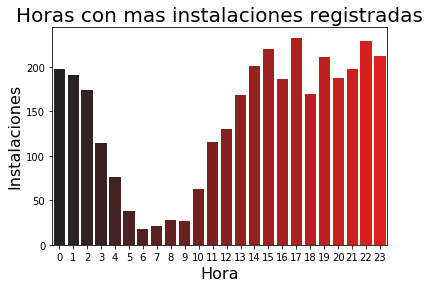

In [93]:
sequential_colors = itertools.cycle(sns.dark_palette("red", 24) )
g = sns.countplot(data=installs, x='hour', palette = sequential_colors, hue_order = installs['hour'].value_counts())
g.set_title('Horas con mas instalaciones registradas', fontsize=20)
g.set_xlabel('Hora',fontsize=16)
g.set_ylabel('Instalaciones',fontsize=16)

Text(0,0.5,'Instalaciones')

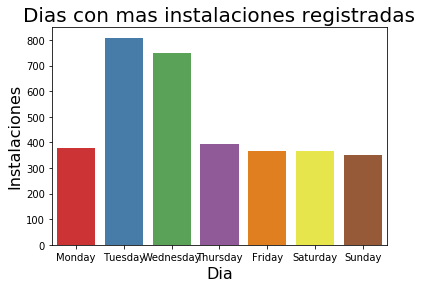

In [94]:
qualitative_colors = sns.color_palette("Set1", 7)
g = sns.countplot(data=installs, x='weekday', palette = qualitative_colors,
                  hue_order = installs['weekday'].value_counts(),
                  order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g.set_title('Dias con mas instalaciones registradas', fontsize=20)
g.set_xlabel('Dia',fontsize=16)
g.set_ylabel('Instalaciones',fontsize=16)

In [95]:
g_plot = pd.crosstab(installs['weekday'],installs['implicit'])

Text(0,0.5,'Instalaciones')

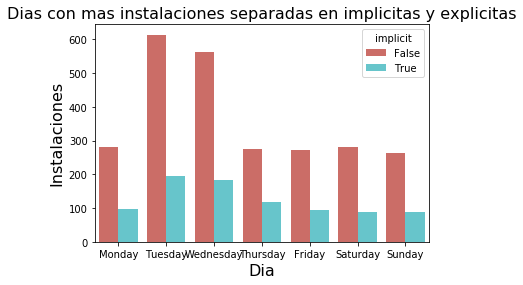

In [96]:
g_bp = sns.countplot(x='weekday', hue='implicit', data=installs, palette='hls',
                    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g_bp.set_title('Dias con mas instalaciones separadas en implicitas y explicitas', fontsize = 16)
g_bp.set_xlabel('Dia', fontsize = 16)
g_bp.set_ylabel('Instalaciones', fontsize=16)